# Data Analysis With Python Final Project

## Final Project ~ House Sales Dataset

### Step 0 ~ Imports and Downloads

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

import sys
sys.path.append(r'C:\\Code\\Python\\HelperFunctions')
from helperFunctions import download_file

file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
file_name= 'housing.csv'
download_file(file_path, file_name)
df = pd.read_csv('housing.csv')


file download successfully to housing.csv


### Step 1 ~ Data Cleaning

In [2]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21600 non-null  float64
 3   bathrooms      21603 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [6]:
df['bedrooms'].replace(np.nan, df['bedrooms'].astype(float).mean(axis=0), inplace=True)
df['bathrooms'].replace(np.nan, df['bathrooms'].astype(float).mean(axis=0), inplace=True)

### Step 2 ~ Data Exploration

In [7]:
df_floors = df['floors'].value_counts().to_frame()
df_floors

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: xlabel='waterfront', ylabel='price'>

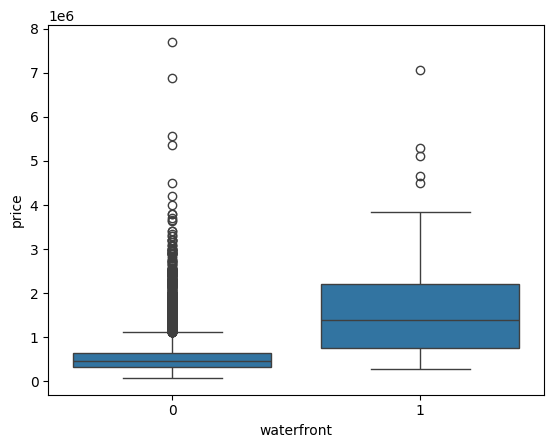

In [8]:
sns.boxplot(x='waterfront', y='price', data=df)

<Axes: xlabel='sqft_above', ylabel='price'>

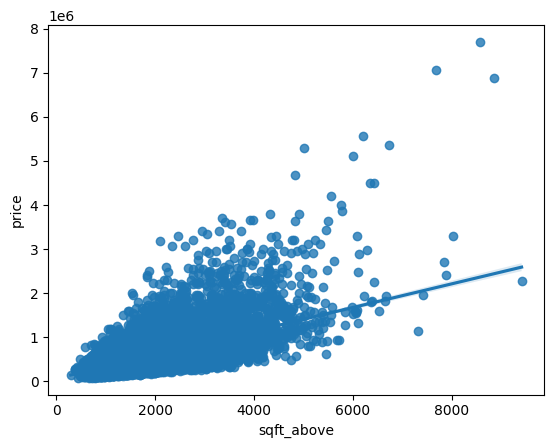

In [9]:
sns.regplot(x='sqft_above', y='price', data=df)

In [10]:
df._get_numeric_data().corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

### Step 3 ~ Model Generation

In [11]:
x_data = df.drop(['price' , 'date'], axis=1)
y_data = df[['price']]

In [12]:
single_lm = LinearRegression()
single_lm.fit(x_data[['long']], y_data)
print(f'R2 Score "long" data Linear Regression: {single_lm.score(x_data[['long']], y_data)}')

R2 Score "long" data Linear Regression: 0.0004676943014898516


In [13]:
x_data = df.drop(['price' , 'date'], axis=1)
y_data = df[['price']]
single_lm = LinearRegression()
single_lm.fit(x_data[['sqft_living']], y_data)
print(f'R2 Score "sqft_living" data Linear Regression: \
      {single_lm.score(x_data[['sqft_living']], y_data)}')

R2 Score "sqft_living" data Linear Regression:       0.4928532179037931


In [14]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,
           "view" ,"bathrooms","sqft_living15","sqft_above","grade",
           "sqft_living"]    
x_data = df.drop(['price' , 'date'], axis=1)
y_data = df[['price']] 
multi_lm = LinearRegression()
multi_lm.fit(x_data[features], y_data)
print(f'R2 Score "multiple features" data Linear Regression: \
      {multi_lm.score(x_data[features], y_data)}')

R2 Score "multiple features" data Linear Regression:       0.6576951666037499


In [15]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,
           "view" ,"bathrooms","sqft_living15","sqft_above","grade",
           "sqft_living"]    
x_data = df.drop(['price' , 'date'], axis=1)
y_data = df[['price']] 
Input = [('scale', StandardScaler()), 
        ('polynomial', PolynomialFeatures(include_bias=False, degree=2)), 
        ('model', LinearRegression())]
pipe_lm = Pipeline(Input)
pipe_lm.fit(x_data[features], y_data)
print(f'R2 Score "features" data Linear (Pipeline) Regression: \
      {pipe_lm.score(x_data[features], y_data)}')

R2 Score "features" data Linear (Pipeline) Regression:       0.7513408515988733


### Step 4 ~ Model Evaluation and Refinement

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [17]:
features =["floors", "waterfront","lat" ,"bedrooms" ,
           "sqft_basement" ,"view" ,"bathrooms","sqft_living15",
           "sqft_above","grade","sqft_living"]    
x_data = df[features]
y_data = df['price']

x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.15, 
                                                    random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [18]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)
print('R2 Training Score = {}'.format(ridge_model.score(x_train, y_train)))
print(f'R2 Test Score = {ridge_model.score(x_test, y_test)}')

R2 Training Score = 0.6594378534950243
R2 Test Score = 0.6478759163939111


In [19]:
x_data_poly = PolynomialFeatures(degree=2).fit_transform(x_data)
x_train_poly = PolynomialFeatures(degree=2).fit_transform(x_train)
x_test_poly = PolynomialFeatures(degree=2).fit_transform(x_test)
ridge_poly_model = Ridge(alpha=0.1)
ridge_poly_model.fit(x_train_poly, y_train)
print('R2 Training Score = {}'.format(ridge_poly_model.score(x_train_poly, 
                                                             y_train)))
print(f'R2 Test Score = {ridge_poly_model.score(x_test_poly, y_test)}')

R2 Training Score = 0.741816743867501
R2 Test Score = 0.7002744254571471
